<a href="https://colab.research.google.com/github/divya223352/AI-ML-internship-task-13/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Components: 2 | Total Variance Retained: 0.2159
Components: 10 | Total Variance Retained: 0.5887
Components: 30 | Total Variance Retained: 0.8932
Components: 50 | Total Variance Retained: 0.9828


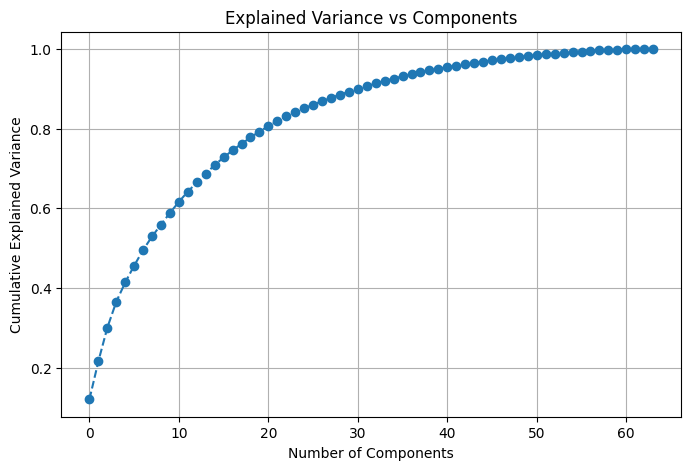


Accuracy Comparison:
Original Data Accuracy (64 features): 0.9722
PCA Reduced Data Accuracy (30 features): 0.9611


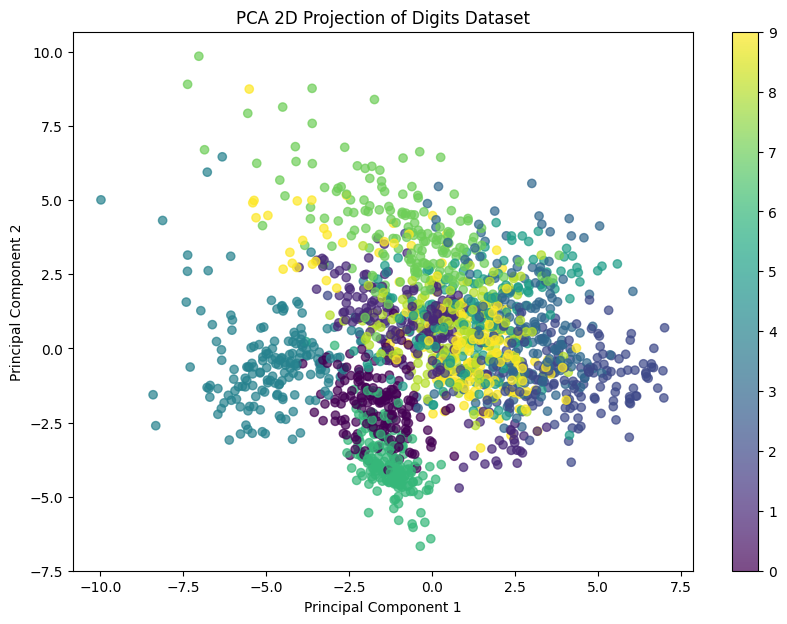

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load and Flatten Dataset
digits = load_digits()
X = digits.data  # Already flattened (8x8 -> 64 features)
y = digits.target

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3 & 4. Track Explained Variance for different components
n_components_list = [2, 10, 30, 50]
for n in n_components_list:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_scaled)
    print(f"Components: {n} | Total Variance Retained: {sum(pca_temp.explained_variance_ratio_):.4f}")

# 5. Plot Cumulative Variance
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.grid()
plt.show()

# 6. Transform into Reduced Dataset (Choosing 30 components as a sweet spot)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

# 7 & 8. Train Logistic Regression and Compare
# Split both original and reduced data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model on Original (64 features)
model_orig = LogisticRegression(max_iter=1000)
model_orig.fit(X_train_orig, y_train)
acc_orig = accuracy_score(y_test, model_orig.predict(X_test_orig))

# Model on Reduced (30 features)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, model_pca.predict(X_test_pca))

print(f"\nAccuracy Comparison:")
print(f"Original Data Accuracy (64 features): {acc_orig:.4f}")
print(f"PCA Reduced Data Accuracy (30 features): {acc_pca:.4f}")

# 9. Visualize 2D Scatter Plot
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('PCA 2D Projection of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Principal Component Analysis (PCA) is an unsupervised machine learning technique used to reduce the dimensionality of large datasets. It transforms a large set of variables into a smaller one that still contains most of the original information (variance).
In simple terms: It squashes data while keeping the "important bits" and throwing away the "noise."
2. Why is Scaling Required?
PCA is extremely sensitive to the variance of the features.
If one feature has a range of 0 to 1000 and another has 0 to 1, PCA will assume the larger numbers are "more important" simply because they have a higher numerical variance.
Standardization (StandardScaler) ensures all features have a mean of 0 and a standard deviation of 1, allowing PCA to treat all pixels in the MNIST/Digits dataset with equal importance.
3. Understanding Explained Variance
Individual Explained Variance: Tells us how much "information" (variance) each specific Principal Component carries.
Cumulative Explained Variance: The sum of variance as we add more components.
Example: If 10 components explain 90% of the variance, we can safely drop the other 54 features (in an 8x8 image) and only lose 10% of the data's detail.